# Capstone Project<br>
Machine Learning Engineering Nanodegree<br>
Michal Kozinski

Project Overview

In [9]:
import os as os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv


%matplotlib inline

In [10]:
stocks = os.listdir("data")

In [11]:
pd.read_csv("data/" + stocks[0]).head(5)

,Date,Close,High,Low,Open,Volume
0,2009-02-11,5.59,5.59,5.52,5.57,0
1,2009-02-12,5.43,5.55,5.43,5.53,0
2,2009-02-13,5.50,5.62,5.50,5.55,0
3,2009-02-16,5.35,5.50,5.35,5.48,0
4,2009-02-17,5.66,5.66,5.34,5.35,0


In [12]:
original_df = pd.DataFrame()
for stock in stocks:
    original_df[stock] = pd.read_csv("data/" + stock, index_col = "Date")["Close"]
for i in range(len(original_df.columns)):
    original_df.columns.values[i] = original_df.columns.values[i][:-4]
    
original_df.head()    

,iberdrola,naturgy-energy,enags,santander,atresmedia,acciona,repsol,colonial,inditex,caixabank,...,bme,bbva,grifols,siemens-gamesa,telefnica,abengoa,bankinter,mapfre,indra,red-elctrica
Date,,,,,,,,,,,,,,,,,,,,,
2009-02-11,5.59,17.14,13.71,5.87,3.45,88.70,14.42,NaN,32.35,2.49,...,16.77,7.17,13.05,13.27,14.33,12.97,7.14,2.28,15.64,32.78
2009-02-12,5.43,16.55,13.81,5.71,3.45,86.55,13.68,NaN,30.23,2.49,...,16.87,6.85,13.18,12.79,13.90,12.40,7.08,2.26,15.01,33.10
2009-02-13,5.50,16.41,13.06,5.72,3.77,87.15,13.90,NaN,31.94,2.54,...,16.50,6.88,12.95,13.25,14.59,12.72,7.23,2.15,15.53,31.80
2009-02-16,5.35,16.02,12.38,5.49,3.53,85.50,13.61,NaN,30.85,2.44,...,16.23,6.54,13.18,13.07,14.30,12.56,7.03,2.08,15.63,32.01
2009-02-17,5.66,16.30,13.02,5.12,3.33,81.40,13.15,NaN,29.50,2.38,...,15.56,6.01,13.19,12.63,13.87,11.90,7.08,2.03,15.28,31.06


In [13]:
original_df.describe()

,iberdrola,naturgy-energy,enags,santander,atresmedia,acciona,repsol,colonial,inditex,caixabank,...,bme,bbva,grifols,siemens-gamesa,telefnica,abengoa,bankinter,mapfre,indra,red-elctrica
count,2604.000000,2604.000000,2604.000000,2604.000000,2601.000000,2603.000000,2604.000000,2242.000000,2604.000000,2570.000000,...,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2603.000000,2604.000000,2604.000000,2604.000000,2604.000000
mean,5.396829,16.967475,20.381432,6.027944,7.908727,66.590903,15.634099,4.306224,34.989477,3.463835,...,25.531759,7.360235,19.051526,9.852517,11.852211,5.840077,5.847859,2.606791,11.441373,28.540112
std,1.063294,4.257420,5.047747,1.990627,3.165302,14.117735,3.194638,3.528028,14.793311,0.737223,...,5.980988,1.830331,5.963078,5.207956,3.424996,7.563162,2.032695,0.383327,2.353781,11.249886
min,2.479000,8.500000,10.890000,3.190000,2.860000,30.470000,7.384000,0.060000,15.580000,1.811000,...,13.170000,4.191000,8.010000,1.006000,6.633000,0.010600,1.350000,1.323000,6.103000,14.980000
25%,4.679000,13.019250,15.198750,4.588000,4.940000,59.140000,13.581250,0.318500,23.850000,2.829000,...,20.261500,5.971000,12.831000,5.510000,9.240250,0.448500,4.477750,2.370000,9.748750,18.389250
50%,5.621500,17.522500,21.522500,5.491000,7.655000,67.560000,15.738000,5.750000,30.130000,3.500000,...,25.750000,7.196000,19.300000,9.839500,10.937000,2.454000,6.368000,2.634000,11.097500,29.790000
75%,6.080000,20.441250,25.010000,6.848250,10.570000,74.535000,17.483250,7.064000,42.552500,4.020000,...,29.496250,8.457500,23.910250,13.571250,13.852500,4.626000,7.300000,2.880000,13.140000,36.550000
max,8.870000,26.950000,29.400000,11.980000,15.670000,105.700000,24.090000,10.140000,81.530000,5.240000,...,43.300000,13.220000,33.840000,20.880000,19.800000,24.000000,9.520000,3.605000,17.820000,64.900000


In [14]:
pct_df = original_df.pct_change()
pct_df.head()

,iberdrola,naturgy-energy,enags,santander,atresmedia,acciona,repsol,colonial,inditex,caixabank,...,bme,bbva,grifols,siemens-gamesa,telefnica,abengoa,bankinter,mapfre,indra,red-elctrica
Date,,,,,,,,,,,,,,,,,,,,,
2009-02-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-02-12,-0.028623,-0.034422,0.007294,-0.027257,0.000000,-0.024239,-0.051318,NaN,-0.065533,0.00000,...,0.005963,-0.044630,0.009962,-0.036172,-0.030007,-0.043948,-0.008403,-0.008772,-0.040281,0.009762
2009-02-13,0.012891,-0.008459,-0.054308,0.001751,0.092754,0.006932,0.016082,NaN,0.056566,0.02008,...,-0.021932,0.004380,-0.017451,0.035966,0.049640,0.025806,0.021186,-0.048673,0.034644,-0.039275
2009-02-16,-0.027273,-0.023766,-0.052067,-0.040210,-0.063660,-0.018933,-0.020863,NaN,-0.034126,-0.03937,...,-0.016364,-0.049419,0.017761,-0.013585,-0.019877,-0.012579,-0.027663,-0.032558,0.006439,0.006604
2009-02-17,0.057944,0.017478,0.051696,-0.067395,-0.056657,-0.047953,-0.033799,NaN,-0.043760,-0.02459,...,-0.041282,-0.081040,0.000759,-0.033665,-0.030070,-0.052548,0.007112,-0.024038,-0.022393,-0.029678


In [15]:
df = pd.DataFrame()
#original_df
#current
len(pct_df)

2604

In [16]:
#for i in len()
def create_data(df, look_back, predict_next, stocks):
    return_df = pd.DataFrame()
    df_len = len(df)
    log_pow_df = np.log(df).diff().pow(2)
    stocks_len = len(stocks)
    h = 0
    for stock in stocks:
        h = h+1
        for i in range(0,df_len-(predict_next+look_back)):

            x_data = log_pow_df[stock].rolling(1).sum()[i:i+look_back]**(1/2)*(252)**(1/2)*100         
            y_data = log_pow_df[stock].rolling(predict_next).sum()[i+look_back +predict_next ]**(1/2)*(252/predict_next)**(1/2)*100 
            
            return_df = pd.concat([return_df,pd.DataFrame(np.concatenate((y_data, x_data), axis=None))],axis=1)
            
        print("Stock " + str(h) + " out of "+ str(stocks_len)+" processed" )
    return_df.dropna(axis=1,inplace=True)
    print("Finihed!")
            
    return return_df.transpose()

#pct_df['repsol'][0:20]*100


In [17]:
# part data
test = ["santander","caixabank","colonial"]
#All data
#original_df.columns
final_df =  create_data(original_df,20,5,test)

Stock 1 out of 3 processed
Stock 2 out of 3 processed
Stock 3 out of 3 processed
Finihed!


In [18]:
from sklearn.model_selection import train_test_split
final_df.reset_index(inplace=True,drop=True)

In [19]:
final_df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,69.317749,43.870171,2.777692,65.149853,110.762500,30.706002,6.093868,87.865552,29.307616,98.749935,...,267.548031,54.610572,186.974773,45.209759,50.613770,49.049755,63.127633,6.200988,3.109601,30.825256
1,44.426601,10.799027,8.106149,29.373350,131.940824,43.231286,46.693095,82.636913,34.298110,65.496182,...,47.962887,16.622673,21.631004,93.959420,69.176053,42.039481,6.712275,20.222576,72.922878,104.901385
2,33.252578,8.106149,29.373350,131.940824,43.231286,46.693095,82.636913,34.298110,65.496182,38.485540,...,16.622673,21.631004,93.959420,69.176053,42.039481,6.712275,20.222576,72.922878,104.901385,16.234116
3,24.983940,29.373350,131.940824,43.231286,46.693095,82.636913,34.298110,65.496182,38.485540,47.962887,...,21.631004,93.959420,69.176053,42.039481,6.712275,20.222576,72.922878,104.901385,16.234116,66.200927
4,29.593049,131.940824,43.231286,46.693095,82.636913,34.298110,65.496182,38.485540,47.962887,16.622673,...,93.959420,69.176053,42.039481,6.712275,20.222576,72.922878,104.901385,16.234116,66.200927,52.773307


In [20]:
def split_data_stocks(df):
    return df.iloc[:,1:], df[0]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(final_df.iloc[:,1:], final_df[0], test_size=0.3, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.33)

In [27]:
import sagemaker
import os
from sagemaker import get_execution_role
from sagemaker.amazon.amazon_estimator import get_image_uri

session = sagemaker.Session()
role = get_execution_role()

In [23]:
# This is our local data directory. We need to make sure that it exists.
data_dir = '../data_processed/stocks'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

In [24]:
X_test.to_csv(os.path.join(data_dir, 'test.csv'), header=False, index=False)

pd.concat([Y_val, X_val], axis=1).to_csv(os.path.join(data_dir, 'validation.csv'), header=False, index=False)
pd.concat([y_train, X_train], axis=1).to_csv(os.path.join(data_dir, 'train.csv'), header=False, index=False)

In [25]:
prefix = 'mlfinal'

val_location = session.upload_data(os.path.join(data_dir, 'validation.csv'), key_prefix=prefix)
test_location = session.upload_data(os.path.join(data_dir, 'test.csv'), key_prefix=prefix)
train_location = session.upload_data(os.path.join(data_dir, 'train.csv'), key_prefix=prefix)

In [36]:
# As stated above, we use this utility method to construct the image name for the training container.
container = get_image_uri(session.boto_region_name, 'xgboost','0.90-1')

# Now that we know which container to use, we can construct the estimator object.
xgb = sagemaker.estimator.Estimator(container, # The name of the training container
                                    role,      # The IAM role to use (our current role in this case)
                                    train_instance_count=1, # The number of instances to use for training
                                    train_instance_type='ml.m4.xlarge', # The type of instance ot use for training
                                    output_path='s3://{}/{}/output'.format(session.default_bucket(), prefix),
                                                                        # Where to save the output (the model artifacts)
                                    sagemaker_session=session) # The current SageMaker session

In [37]:
xgb.set_hyperparameters(max_depth=5,
                        eta=0.2,
                        gamma=4,
                        min_child_weight=6,
                        subsample=0.8,
                        objective='reg:linear',
                        early_stopping_rounds=10,
                        num_round=200)

In [38]:
s3_input_train = sagemaker.s3_input(s3_data=train_location, content_type='csv')
#s3_input_validation = sagemaker.s3_input(s3_data=val_location, content_type='csv')

#xgb.fit({'train': s3_input_train, 'validation': s3_input_validation})
xgb.fit({'train': s3_input_train})

2020-01-28 21:13:57 Starting - Starting the training job...
2020-01-28 21:13:59 Starting - Launching requested ML instances......
2020-01-28 21:15:06 Starting - Preparing the instances for training...
2020-01-28 21:15:55 Downloading - Downloading input data...
2020-01-28 21:16:13 Training - Downloading the training image...
2020-01-28 21:16:56 Uploading - Uploading generated training model
2020-01-28 21:16:56 Completed - Training job completed
INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value reg:linear to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
[21:16:45] 4041x20 matrix with 80820 entries loaded from /opt/ml/input/data/train?format=

In [39]:
xgb_transformer = xgb.transformer(instance_count = 1, instance_type = 'ml.m4.xlarge')

In [40]:
xgb_transformer.transform(test_location, content_type='text/csv', split_type='Line')

In [41]:
xgb_transformer.wait()

.....................[2020-01-28 21:22:32 +0000] [15] [INFO] Starting gunicorn 19.10.0
[2020-01-28 21:22:32 +0000] [15] [INFO] Listening at: unix:/tmp/gunicorn.sock (15)
[2020-01-28 21:22:32 +0000] [15] [INFO] Using worker: gevent
[2020-01-28 21:22:32 +0000] [22] [INFO] Booting worker with pid: 22
[2020-01-28 21:22:32 +0000] [23] [INFO] Booting worker with pid: 23
[2020-01-28 21:22:32 +0000] [24] [INFO] Booting worker with pid: 24
[2020-01-28 21:22:32 +0000] [25] [INFO] Booting worker with pid: 25

[2020-01-28:21:23:13:INFO] No GPUs detected (normal if no gpus installed)
169.254.255.130 - - [28/Jan/2020:21:23:13 +0000] "GET /ping HTTP/1.1" 200 0 "-" "Go-http-client/1.1"
[2020-01-28:21:23:13:INFO] No GPUs detected (normal if no gpus installed)
169.254.255.130 - - [28/Jan/2020:21:23:13 +0000] "GET /execution-parameters HTTP/1.1" 200 84 "-" "Go-http-client/1.1"
[2020-01-28:21:23:13:INFO] No GPUs detected (normal if no gpus installed)
[2020-01-28:21:23:13:INFO] Determined delimiter of CSV 

In [42]:
!aws s3 cp --recursive $xgb_transformer.output_path $data_dir

download: s3://sagemaker-us-east-1-930398515265/sagemaker-xgboost-2020-01-28-21-19-12-947/test.csv.out to ../data_processed/stocks/test.csv.out


In [43]:
Y_pred = pd.read_csv(os.path.join(data_dir, 'test.csv.out'), header=None)

Text(0.5, 1.0, 'Vol vs Predicted Vol')

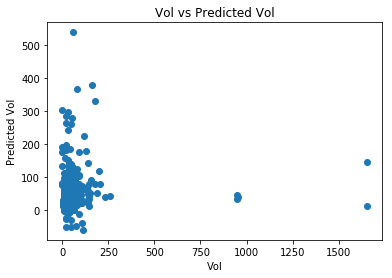

In [45]:
plt.scatter(y_test, Y_pred)
plt.xlabel("Vol")
plt.ylabel("Predicted Vol")
plt.title("Vol vs Predicted Vol")

In [52]:
# Now that we know which container to use, we can construct the estimator object.
xgb2 = sagemaker.estimator.Estimator(container, # The name of the training container
                                    role,      # The IAM role to use (our current role in this case)
                                    train_instance_count=1, # The number of instances to use for training
                                    train_instance_type='ml.m4.xlarge', # The type of instance ot use for training
                                    output_path='s3://{}/{}/output'.format(session.default_bucket(), prefix),
                                                                        # Where to save the output (the model artifacts)
                                    sagemaker_session=session) # The current SageMaker session

In [53]:
xgb2.set_hyperparameters(max_depth=5,
                        eta=0.2,
                        gamma=4,
                        min_child_weight=6,
                        subsample=0.8,
                        objective='reg:squarederror',
                        early_stopping_rounds=10,
                        num_round=300)

In [54]:
s3_input_train = sagemaker.s3_input(s3_data=train_location, content_type='csv')
#s3_input_validation = sagemaker.s3_input(s3_data=val_location, content_type='csv')

#xgb.fit({'train': s3_input_train, 'validation': s3_input_validation})
xgb2.fit({'train': s3_input_train})

2020-01-28 21:40:44 Starting - Starting the training job...
2020-01-28 21:41:14 Starting - Launching requested ML instances.........
2020-01-28 21:42:17 Starting - Preparing the instances for training...
2020-01-28 21:43:09 Downloading - Downloading input data...
2020-01-28 21:43:23 Training - Downloading the training image.................................
2020-01-28 21:49:13 Uploading - Uploading generated training model
2020-01-28 21:49:13 Completed - Training job completed
INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value reg:squarederror to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
[21:49:03] 4041x20 matrix with 80820 entries loade

In [55]:
xgb_transformer2 = xgb2.transformer(instance_count = 1, instance_type = 'ml.m4.xlarge')

In [56]:
xgb_transformer2.transform(test_location, content_type='text/csv', split_type='Line')

In [57]:
xgb_transformer2.wait()

.......................[2020-01-28 21:53:04 +0000] [14] [INFO] Starting gunicorn 19.10.0
[2020-01-28 21:53:04 +0000] [14] [INFO] Listening at: unix:/tmp/gunicorn.sock (14)
[2020-01-28 21:53:04 +0000] [14] [INFO] Using worker: gevent
[2020-01-28 21:53:04 +0000] [21] [INFO] Booting worker with pid: 21
[2020-01-28 21:53:04 +0000] [22] [INFO] Booting worker with pid: 22
[2020-01-28 21:53:04 +0000] [23] [INFO] Booting worker with pid: 23
[2020-01-28 21:53:04 +0000] [27] [INFO] Booting worker with pid: 27

[2020-01-28:21:53:21:INFO] No GPUs detected (normal if no gpus installed)
169.254.255.130 - - [28/Jan/2020:21:53:21 +0000] "GET /ping HTTP/1.1" 200 0 "-" "Go-http-client/1.1"
[2020-01-28:21:53:21:INFO] No GPUs detected (normal if no gpus installed)
169.254.255.130 - - [28/Jan/2020:21:53:21 +0000] "GET /execution-parameters HTTP/1.1" 200 84 "-" "Go-http-client/1.1"
[2020-01-28:21:53:21:INFO] No GPUs detected (normal if no gpus installed)
[2020-01-28:21:53:21:INFO] Determined delimiter of CS

In [58]:
!aws s3 cp --recursive $xgb_transformer.output_path $data_dir

download: s3://sagemaker-us-east-1-930398515265/sagemaker-xgboost-2020-01-28-21-19-12-947/test.csv.out to ../data_processed/stocks/test.csv.out


In [59]:
Y_pred = pd.read_csv(os.path.join(data_dir, 'test.csv.out'), header=None)

Text(0.5, 1.0, 'Vol vs Predicted Vol')

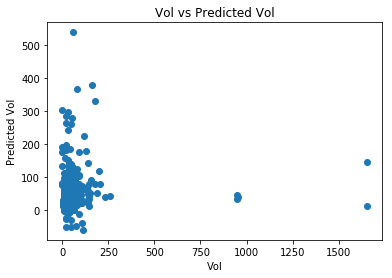

In [60]:
plt.scatter(y_test, Y_pred)
plt.xlabel("Vol")
plt.ylabel("Predicted Vol")
plt.title("Vol vs Predicted Vol")